In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2907 non-null   float64
 1   LotArea        2907 non-null   int64  
 2   OverallQual    2907 non-null   int64  
 3   OverallCond    2907 non-null   int64  
 4   YearBuilt      2907 non-null   int64  
 5   YearRemodAdd   2907 non-null   int64  
 6   MasVnrArea     2907 non-null   float64
 7   BsmtFinSF1     2907 non-null   float64
 8   BsmtFinSF2     2907 non-null   float64
 9   BsmtUnfSF      2907 non-null   float64
 10  TotalBsmtSF    2907 non-null   float64
 11  1stFlrSF       2907 non-null   int64  
 12  2ndFlrSF       2907 non-null   int64  
 13  LowQualFinSF   2907 non-null   int64  
 14  GrLivArea      2907 non-null   int64  
 15  BsmtFullBath   2907 non-null   float64
 16  BsmtHalfBath   2907 non-null   float64
 17  FullBath       2907 non-null   int64  
 18  HalfBath

In [4]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSSubClass', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical'

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
df_to_predict = df[df['SalePrice'].isnull()]
df_to_predict = df_to_predict.drop(['SalePrice'], axis = 1)

In [7]:
df = df.dropna()

In [8]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Ridge

In [12]:
ridge = Ridge()

In [13]:
param_grid = {'alpha':[1, 10, 50, 100, 110]}

In [14]:
grid_model = GridSearchCV(estimator=ridge,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10)

In [15]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 50, 100, 110]},
             scoring='neg_mean_squared_error')

In [16]:
grid_model.best_params_

{'alpha': 100}

In [17]:
y_pred = grid_model.predict(X_test)

In [18]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [19]:
MAE

15830.256044589287

In [20]:
RMSE

23034.779460280508

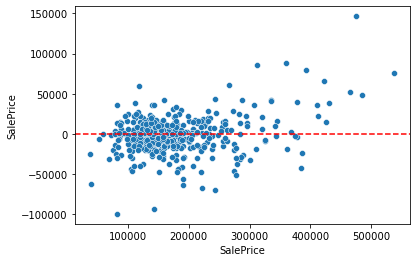

In [21]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

## RigdeCV

In [22]:
ridgeCV = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error', cv=10)

In [23]:
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10,
        scoring='neg_mean_absolute_error')

In [24]:
ridgeCV.alpha_

10.0

In [25]:
y_pred = ridgeCV.predict(X_test)

In [26]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [27]:
MAE

16137.38640462468

In [28]:
RMSE

23460.14354183018

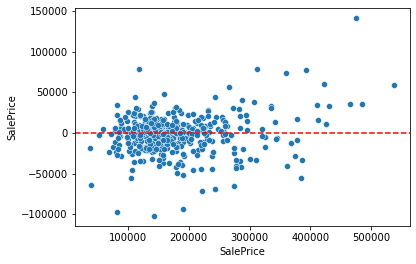

In [29]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

## Lasso

In [30]:
lasso = Lasso(max_iter=1000000)

In [31]:
param_grid = {'alpha':[350, 370, 400]}

In [32]:
grid_model = GridSearchCV(estimator=lasso,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10)

In [33]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000),
             param_grid={'alpha': [350, 370, 400]},
             scoring='neg_mean_squared_error')

In [34]:
grid_model.best_params_

{'alpha': 350}

In [35]:
y_pred = grid_model.predict(X_test)

In [36]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [37]:
MAE

15246.678996022321

In [38]:
RMSE

22496.53731189179

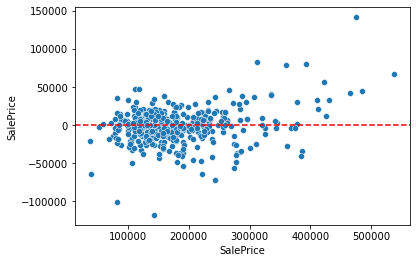

In [39]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

## LassoCV

In [40]:
lassoCV = LassoCV()

In [52]:
param_grid = {'n_alphas':[104, 105, 110],
             'eps':[.001, .005, .009]}

In [53]:
grid_model = GridSearchCV(estimator=lassoCV,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10)

In [54]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LassoCV(),
             param_grid={'eps': [0.001, 0.005, 0.009],
                         'n_alphas': [104, 105, 110]},
             scoring='neg_mean_squared_error')

In [55]:
grid_model.best_params_

{'eps': 0.001, 'n_alphas': 105}

In [56]:
y_pred = grid_model.predict(X_test)

In [57]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [58]:
MAE

15246.725290258068

In [59]:
RMSE

22499.85298919799

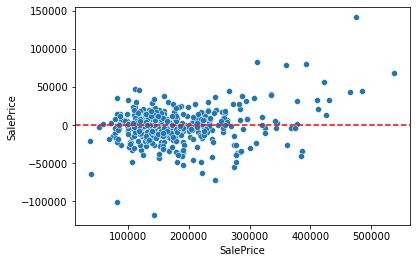

In [60]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [62]:
test_residuals.sort_values(ascending=False)

185     141378.071623
218      83191.874268
1175     80010.629161
605      79167.652375
765      68068.586557
            ...      
412     -62711.839641
30      -63951.572438
70      -72320.752530
629    -100683.223470
585    -117852.418773
Name: SalePrice, Length: 435, dtype: float64

## ElasticNet

In [63]:
elasticnet = ElasticNet(max_iter=100000)

In [64]:
param_grid = {'alpha':[100],
              'l1_ratio':[.97, .98, .99, 1]}

In [65]:
grid_model = GridSearchCV(estimator=elasticnet,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10)

In [66]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [100], 'l1_ratio': [0.97, 0.98, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [67]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=100000)

In [68]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [69]:
y_pred = grid_model.predict(X_test)

In [70]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [71]:
MAE

15489.985162295508

In [72]:
RMSE

22844.17711186713

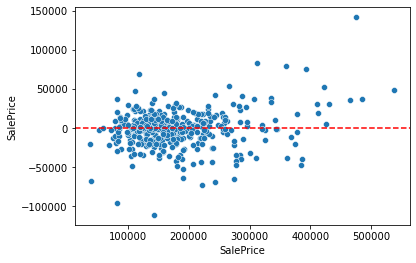

In [73]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

## ElasticNetCV

In [76]:
elasticnetCV = ElasticNetCV()

In [77]:
param_grid = {'n_alphas':[300, 350],
              'l1_ratio':[.99, 1],
             'eps': [.0001, .001, .005]}

In [78]:
grid_model = GridSearchCV(estimator=elasticnetCV,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10)

In [79]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNetCV(),
             param_grid={'eps': [0.0001, 0.001, 0.005], 'l1_ratio': [0.99, 1],
                         'n_alphas': [300, 350]},
             scoring='neg_mean_squared_error')

In [80]:
grid_model.best_params_

{'eps': 0.001, 'l1_ratio': 1, 'n_alphas': 300}

In [81]:
y_pred = grid_model.predict(X_test)

In [82]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [83]:
MAE

15246.671801910348

In [84]:
RMSE

22500.10801845674

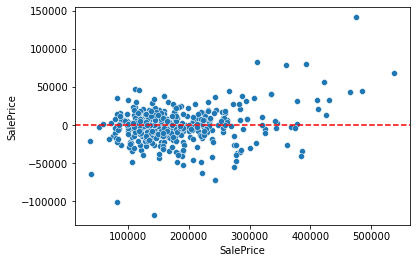

In [85]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');